In [945]:
# std lib
from getpass import getpass

# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.utils.data import download_file  #import file from URL
from scipy.stats import binned_statistic_2d
%matplotlib inline
from astropy.table import Table

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord

print('Done importing')

Done importing


In [946]:
ac.whoAmI()

'yuxinhuang'

In [964]:
RA180924 = (21 + 44/60 + 25/3600)/24*360
RA191001 = (21 + 33/60 + 24/3600)/24*360
RA181112 = (21 + 49/60 + 23/3600)/24*360

DEC180924 = - (40 + 54/60)
DEC191001 = - (54 + 44/60 + 54/3600)
DEC181112 = - (52 + 58/60 + 15/3600)

In [6]:
#FRB191001

In [1022]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000


In [1023]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res6 = qc.query(sql=query)
df6 = convert(res6,'pandas')

CPU times: user 85 ms, sys: 17 ms, total: 102 ms
Wall time: 4min 43s


In [1024]:
print(df6[0:5])
len(df6)

          id  rmag_aper          ra        dec
0  200616296    18.7201  322.351520 -55.608142
1  200615782    21.0934  322.352571 -55.599344
2  200616028    19.6563  322.353898 -55.603770
3  200615822    21.8096  322.361689 -55.599937
4  200615943    17.9893  322.372126 -55.603839


43416

In [ ]:
ra = df['ra'][:]
dec = df['dec'][:]
rmag_aper = df['rmag_aper'][:]

In [1047]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and mag_aper_8_r<24.3 and mag_aper_8_r>=22)
        LIMIT 500000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and mag_aper_8_r<24.3 and mag_aper_8_r>=22)
        LIMIT 500000


In [1048]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res = qc.query(sql=query)
df7 = convert(res,'pandas')

CPU times: user 171 ms, sys: 22 ms, total: 193 ms
Wall time: 4min 58s


In [1049]:
print(len(df7))
ra1 = df7['ra'][:]
dec1 = df7['dec'][:]
rmag_aper1 = df7['rmag_aper'][:]

119247


In [1050]:
ra = np.hstack((ra,ra1))
dec = np.hstack((dec,dec1))
rmag_aper = np.hstack((rmag_aper,rmag_aper1))

In [1051]:
ra.shape

(162540,)

Text(0, 0.5, 'dec')

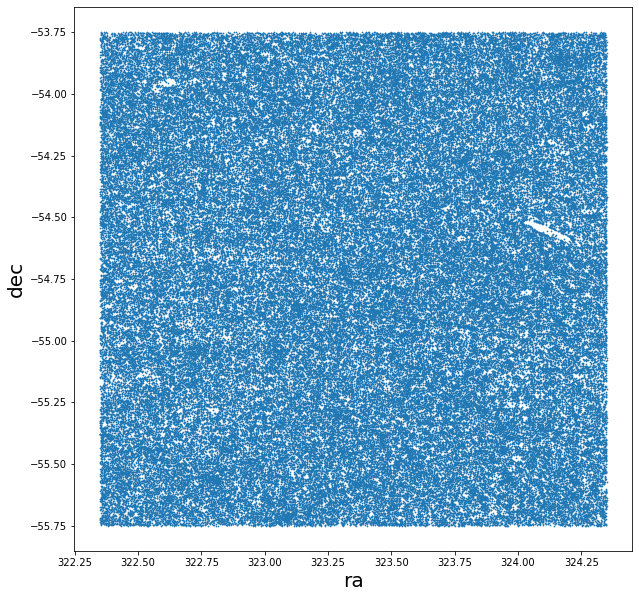

In [1053]:
col0 = ra   #ra
col1 = dec   #dec

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax1.scatter(col0, col1, marker='o', lw=0, s = 3)

ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)
#ax1.legend(*im1.legend_elements("sizes", num=5))


In [ ]:
#method1: random

In [1056]:
racen = 323.35
deccen = -54.75

for i in range(1000000):
    raini = np.random.uniform(racen-1, racen+1)
    decini = np.random.uniform(deccen-1, deccen+1)
    if(len(np.where((ra>raini-0.02)*(ra<raini+0.02)*(dec>decini-0.02)*(dec<decini+0.02))[0])==0):
        #print('find one!')
        print(raini, decini)

In [ ]:
#method2: ergodic

In [958]:
Ng = 4000
H, xedges, yedges = np.histogram2d(ra, dec, bins=Ng)
x, y = np.where(H==0)
dx = 0.02
edg = 1-dx
iinmid = np.where((xedges[x]-(323.35)< edg)*(xedges[x]-(323.35)> -edg)*(yedges[y]-(-54.75)< edg)*(yedges[y]-(-54.75)> -edg))
x = x[iinmid]
y = y[iinmid]

In [960]:
#ramax = max(ra)-0.02
#ramin = min(ra)+0.02
#decmax = max(dec)-0.02
#decmin = min(dec)+0.02

#num = np.random.choice(range(len(x)))
num = len(x)
iset = np.array([])

for i in range(num):
    raini = (xedges[x[i]]+xedges[x[i]+1])/2
    decini = (yedges[y[i]]+yedges[y[i]+1])/2

    if(len(np.where((ra>raini-0.02)*(ra<raini+0.02)*(dec>decini-0.02)*(dec<decini+0.02))[0])==0):
        iset = np.append(iset,i)

In [961]:
iset.astype(int)

array([], dtype=int64)